In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
filepath = '.\\train'
images = [] #儲存影像
fileslist = [] #儲存影像名稱與路徑
counter = 0
import os
for root, dirs, files in os.walk(filepath, topdown=False):
    for name in tqdm(files):
        counter +=  1
        #if counter % 1000 == 0:
        #    print('The status is', counter)
        filename = os.path.join(root, name)
        fileslist.append(filename)
        images.append(plt.imread(filename))

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [00:24<00:00, 883.95it/s]


In [2]:
fileslist[:3]

['.\\train\\00000.jpg', '.\\train\\00001.jpg', '.\\train\\00002.jpg']

In [3]:
from skimage.color import rgb2gray
rgb2gray(images[0]).max()

0.8425086

In [4]:
images_g=[rgb2gray(i) for i in images]

In [5]:
from skimage.filters import sobel
from skimage.feature import canny
def boundary(i):
    image_sobel=sobel(i)
    image_sobel[image_sobel>=0.25]=1
    image_sobel[image_sobel<0.25]=0
    image_sobel=abs(image_sobel-1)
    img_Canny= canny(i, sigma=1)
    return img_Canny*image_sobel

In [6]:
img =[boundary(i) for i in tqdm(images_g)]

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [03:15<00:00, 111.07it/s]


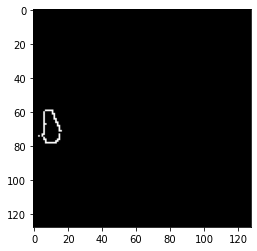

In [7]:
plt.imshow(img[2020],'gray')
plt.show()

In [8]:
import numpy as np
ii = np.array(img).astype('uint8')
ii = np.expand_dims(ii,axis=3)
ii.shape, ii.dtype

((21765, 128, 128, 1), dtype('uint8'))

In [9]:
X = ii
train = int(np.floor(X.shape[0] * 0.8))
X_train = X[:train]
X_test = X[train:]
X_train.shape,X_test.shape

((17412, 128, 128, 1), (4353, 128, 128, 1))

In [10]:
np.save('X_train_bi',X_train)
np.save('X_test_bi',X_test)